# Milestone 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
file_path = r"C:\Users\sakth\Desktop\ImpactSense\Significant_Earthquakes.xlsx"
df = pd.read_excel(file_path)
print("Dataset loaded successfully!")
df.info()
print("------------------------------------------")
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109821 entries, 0 to 109820
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       109821 non-null  int64  
 1   time             109821 non-null  object 
 2   latitude         109821 non-null  float64
 3   longitude        109821 non-null  float64
 4   depth            109536 non-null  float64
 5   mag              109821 non-null  float64
 6   magType          109821 non-null  object 
 7   nst              39181 non-null   float64
 8   gap              49472 non-null   float64
 9   dmin             29528 non-null   float64
 10  rms              81074 non-null   float64
 11  net              109821 non-null  object 
 12  id               109821 non-null  object 
 13  updated          109821 non-null  object 
 14  place            108930 non-null  object 
 15  type             109821 non-null  object 
 16  horizonta

In [6]:
import os
columns_to_drop = ['nst', 'gap', 'dmin', 'rms', 'place', 'horizontalError', 'depthError', 'magError','magNst']
cleaned_df = df.drop(columns=columns_to_drop)
cleaned_df['depth'] = cleaned_df['depth'].fillna(cleaned_df['depth'].median())
cleaned_df.dropna(inplace=True)
print(f"Data cleaning complete. The cleaned dataset has {cleaned_df.shape[0]} rows.")
output_folder = r"C:\Users\sakth\Desktop\ImpactSense"
os.makedirs(output_folder, exist_ok=True)
output_file_path = os.path.join(output_folder, 'cleaned_earthquakes.csv')
cleaned_df.to_csv(output_file_path, index=False)
print(f"Cleaned data has been saved successfully to: '{output_file_path}'")

Data cleaning complete. The cleaned dataset has 109821 rows.
Cleaned data has been saved successfully to: 'C:\Users\sakth\Desktop\ImpactSense\cleaned_earthquakes.csv'


In [7]:

import numpy as np
import pandas as pd
try:
    df = pd.read_csv(output_file_path)
    print("Cleaned data with 'depth' re-loaded successfully.")
except NameError:
    print("Error: 'output_file_path' not defined. Please run the previous cell first.")
    df = cleaned_df.copy()
except Exception as e:
    print(f"An error occurred loading the file: {e}")

df['Magnitude_Class'] = pd.cut(df['mag'],
                             bins=[0, 4, 6, 7, 10],
                             labels=['Low', 'Moderate', 'Strong', 'Major'],
                             right=True)

df['Depth_Class'] = pd.cut(df['depth'],
                         bins=[-1, 70, 300, 700],
                         labels=['Shallow', 'Intermediate', 'Deep'],
                         right=True)

df['Risk_Score'] = (df['mag'] * 0.7) + (np.log1p(df['depth']) * 0.3)
print("\nFeature Engineering complete. New columns added:")
print(df[['mag', 'Magnitude_Class', 'depth', 'Depth_Class', 'Risk_Score']].head())

# Optional: You can save this enhanced DataFrame
enhanced_output_file = os.path.join(output_folder, 'enhanced_earthquakes.csv')
df.to_csv(enhanced_output_file, index=False)
print(f"\nEnhanced data saved to: '{enhanced_output_file}'")

Cleaned data with 'depth' re-loaded successfully.

Feature Engineering complete. New columns added:
    mag Magnitude_Class  depth Depth_Class  Risk_Score
0  7.86           Major   33.0     Shallow    6.559908
1  6.40          Strong   33.0     Shallow    5.537908
2  5.00        Moderate   33.0     Shallow    4.557908
3  7.00          Strong   33.0     Shallow    5.957908
4  7.00          Strong   33.0     Shallow    5.957908


c:\Users\sakth\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



Enhanced data saved to: 'C:\Users\sakth\Desktop\ImpactSense\enhanced_earthquakes.csv'


In [8]:
df.columns

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource',
       'magSource', 'Magnitude_Class', 'Depth_Class', 'Risk_Score'],
      dtype='object')

In [10]:
import geopandas as gpd
soil_map_path = r"C:\Users\sakth\Desktop\ImpactSense\Soil_data\DSMW.shx"
soil_map = gpd.read_file(soil_map_path)
earthquakes_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

earthquakes_gdf.set_crs(soil_map.crs, inplace=True)

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,Magnitude_Class,Depth_Class,Risk_Score,geometry
0,0,1900-10-09T12:25:00.000Z,57.0900,-153.4800,33.0,7.86,mw,ushis,ushis391,2022-05-09T14:44:17.838Z,earthquake,reviewed,ushis,pt,Major,Shallow,6.559908,POINT (-153.48 57.09)
1,1,1901-03-03T07:45:00.000Z,36.0000,-120.5000,33.0,6.40,ms,ushis,ushis393,2018-06-04T20:43:44.000Z,earthquake,reviewed,ushis,ell,Strong,Shallow,5.537908,POINT (-120.5 36)
2,2,1901-07-26T22:20:00.000Z,40.8000,-115.7000,33.0,5.00,fa,ushis,ushis395,2018-06-04T20:43:44.000Z,earthquake,reviewed,ushis,sjg,Moderate,Shallow,4.557908,POINT (-115.7 40.8)
3,3,1901-12-30T22:34:00.000Z,52.0000,-160.0000,33.0,7.00,ms,ushis,ushis397,2018-06-04T20:43:44.000Z,earthquake,reviewed,ushis,abe,Strong,Shallow,5.957908,POINT (-160 52)
4,4,1902-01-01T05:20:30.000Z,52.3800,-167.4500,33.0,7.00,ms,ushis,ushis400,2018-06-04T20:43:44.000Z,earthquake,reviewed,ushis,abe,Strong,Shallow,5.957908,POINT (-167.45 52.38)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109816,109816,2025-08-23T03:44:13.908Z,50.7630,157.3228,45.0,5.40,mww,us,us6000r39a,2025-09-19T01:15:32.626Z,earthquake,reviewed,us,us,Moderate,Shallow,4.928592,POINT (157.3228 50.763)
109817,109817,2025-08-23T00:43:42.343Z,-24.5984,-175.9865,35.0,5.00,mb,us,us6000r389,2025-09-21T02:47:09.040Z,earthquake,reviewed,us,us,Moderate,Shallow,4.575056,POINT (-175.9865 -24.5984)
109818,109818,2025-08-23T00:10:54.678Z,-24.6736,-175.8881,10.0,5.50,mww,us,us6000r385,2025-09-21T02:29:06.803Z,earthquake,reviewed,us,us,Moderate,Shallow,4.569369,POINT (-175.8881 -24.6736)
109819,109819,2025-08-22T15:57:35.988Z,51.2884,159.4807,10.0,5.10,mb,us,us6000r32f,2025-09-20T16:48:10.040Z,earthquake,reviewed,us,us,Moderate,Shallow,4.289369,POINT (159.4807 51.2884)


In [11]:
df_with_soil = gpd.sjoin(earthquakes_gdf, soil_map, how="inner", predicate='within')
print("Columns after adding soil data:")
print(df_with_soil.columns)
df_with_soil.drop(columns=['index_right', 'geometry'], inplace=True)
print("\nData with soil information:")
df_with_soil.head()

Columns after adding soil data:
Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource',
       'magSource', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'geometry',
       'index_right', 'SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2',
       'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM',
       'COUNTRY'],
      dtype='object')

Data with soil information:


,Unnamed: 0,time,latitude,longitude,depth,mag,magType,net,id,updated,...,DOMSOI,PHASE1,PHASE2,MISCLU1,MISCLU2,PERMAFROST,CNTCODE,CNTNAME,SQKM,COUNTRY
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,33.0,7.86,mw,ushis,ushis391,2022-05-09T14:44:17.838Z,...,Tv,None,None,0,0,0,231,US,4903.0,UNITED STATES OF AMERICA
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,33.0,6.40,ms,ushis,ushis393,2018-06-04T20:43:44.000Z,...,Hh,None,None,0,0,0,231,US,3554.0,UNITED STATES OF AMERICA
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,33.0,5.00,fa,ushis,ushis395,2018-06-04T20:43:44.000Z,...,Yl,09,None,0,0,0,231,US,77281.0,UNITED STATES OF AMERICA
5,5,1902-05-19T18:31:00.000Z,38.30,-121.90,33.0,5.40,ml,ushis,ushis402,2018-06-04T20:43:44.000Z,...,Lc,01,None,0,0,0,231,US,9433.0,UNITED STATES OF AMERICA
6,6,1902-07-28T06:57:00.000Z,34.80,-120.40,33.0,5.40,ml,ushis,ushis404,2018-06-04T20:43:44.000Z,...,Lc,09,None,0,0,0,231,US,2488.0,UNITED STATES OF AMERICA


In [12]:
import os
output_folder = r"C:\Users\sakth\Desktop\ImpactSense\Soil_data"
output_file_path = os.path.join(output_folder, 'earthquakes_with_soil.csv')
df_with_soil.to_csv(output_file_path, index=False)
print(f"Data with soil information saved successfully to: '{output_file_path}'")

Data with soil information saved successfully to: 'C:\Users\sakth\Desktop\ImpactSense\Soil_data\earthquakes_with_soil.csv'


In [13]:
final_data_path = r'C:\Users\sakth\Desktop\ImpactSense\Soil_data\earthquakes_with_soil.csv'
df = pd.read_csv(final_data_path)
print("Final dataset with soil info loaded successfully!")
df.head()

Final dataset with soil info loaded successfully!


,Unnamed: 0,time,latitude,longitude,depth,mag,magType,net,id,updated,...,DOMSOI,PHASE1,PHASE2,MISCLU1,MISCLU2,PERMAFROST,CNTCODE,CNTNAME,SQKM,COUNTRY
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,33.0,7.86,mw,ushis,ushis391,2022-05-09T14:44:17.838Z,...,Tv,NaN,NaN,0.0,0.0,0.0,231,US,4903.0,UNITED STATES OF AMERICA
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,33.0,6.40,ms,ushis,ushis393,2018-06-04T20:43:44.000Z,...,Hh,NaN,NaN,0.0,0.0,0.0,231,US,3554.0,UNITED STATES OF AMERICA
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,33.0,5.00,fa,ushis,ushis395,2018-06-04T20:43:44.000Z,...,Yl,9.0,NaN,0.0,0.0,0.0,231,US,77281.0,UNITED STATES OF AMERICA
3,5,1902-05-19T18:31:00.000Z,38.30,-121.90,33.0,5.40,ml,ushis,ushis402,2018-06-04T20:43:44.000Z,...,Lc,1.0,NaN,0.0,0.0,0.0,231,US,9433.0,UNITED STATES OF AMERICA
4,6,1902-07-28T06:57:00.000Z,34.80,-120.40,33.0,5.40,ml,ushis,ushis404,2018-06-04T20:43:44.000Z,...,Lc,9.0,NaN,0.0,0.0,0.0,231,US,2488.0,UNITED STATES OF AMERICA


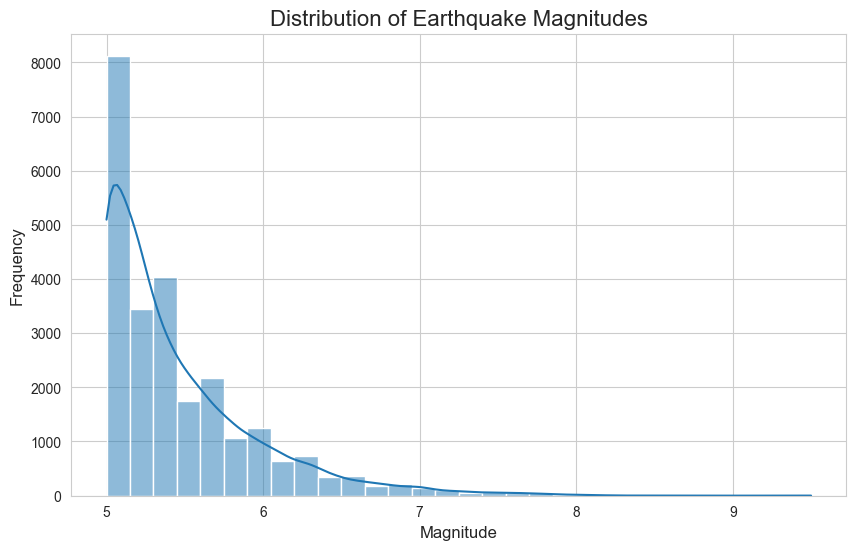

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mag'], kde=True, bins=30)
plt.title('Distribution of Earthquake Magnitudes', fontsize=16)
plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

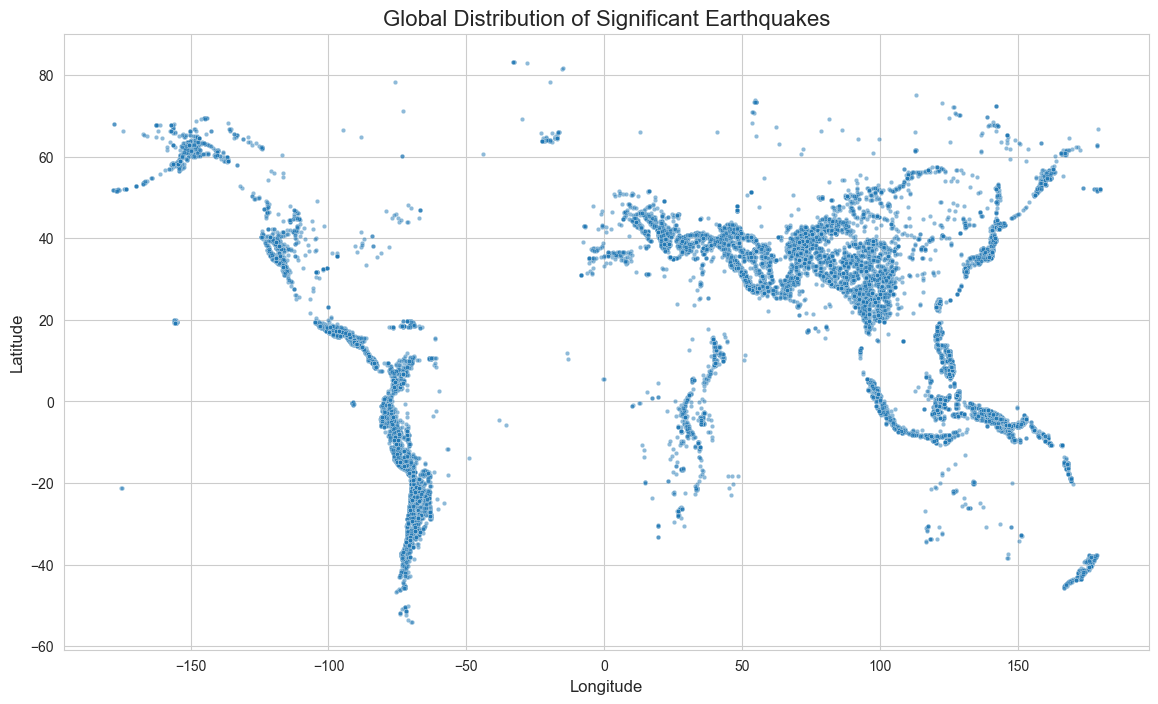

In [15]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, s=10, alpha=0.5)
plt.title('Global Distribution of Significant Earthquakes', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

# Milestone 2

In [16]:
import pandas as pd

# Load dataset
df = pd.read_csv(r'C:\Users\sakth\Desktop\ImpactSense\Soil_data\earthquakes_with_soil.csv')

import pandas as pd
df['damage_risk'] = pd.cut(df['mag'],
                           bins=[-1, 4.9, 6.9, float('inf')],
                           labels=['Low', 'Medium', 'High'])

print("Dataset loaded and 'damage_risk' column added.")
df.head()


Dataset loaded and 'damage_risk' column added.


,Unnamed: 0,time,latitude,longitude,depth,mag,magType,net,id,updated,...,PHASE1,PHASE2,MISCLU1,MISCLU2,PERMAFROST,CNTCODE,CNTNAME,SQKM,COUNTRY,damage_risk
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,33.0,7.86,mw,ushis,ushis391,2022-05-09T14:44:17.838Z,...,NaN,NaN,0.0,0.0,0.0,231,US,4903.0,UNITED STATES OF AMERICA,High
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,33.0,6.40,ms,ushis,ushis393,2018-06-04T20:43:44.000Z,...,NaN,NaN,0.0,0.0,0.0,231,US,3554.0,UNITED STATES OF AMERICA,Medium
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,33.0,5.00,fa,ushis,ushis395,2018-06-04T20:43:44.000Z,...,9.0,NaN,0.0,0.0,0.0,231,US,77281.0,UNITED STATES OF AMERICA,Medium
3,5,1902-05-19T18:31:00.000Z,38.30,-121.90,33.0,5.40,ml,ushis,ushis402,2018-06-04T20:43:44.000Z,...,1.0,NaN,0.0,0.0,0.0,231,US,9433.0,UNITED STATES OF AMERICA,Medium
4,6,1902-07-28T06:57:00.000Z,34.80,-120.40,33.0,5.40,ml,ushis,ushis404,2018-06-04T20:43:44.000Z,...,9.0,NaN,0.0,0.0,0.0,231,US,2488.0,UNITED STATES OF AMERICA,Medium


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import os

numerical_features = ['mag', 'depth', 'latitude', 'longitude']
categorical_features = ['DOMSOI']

features = numerical_features + categorical_features

target = 'Magnitude_Class'

df_model = df.dropna(subset=features + [target])

X = df_model[features]
y = df_model[target]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Pipeline for numeric features: Scale them
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical features: One-Hot Encode them
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# --- Split the data ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# --- Save the preprocessor for the RF model ---
models_folder = 'models'
os.makedirs(models_folder, exist_ok=True)
joblib.dump(preprocessor_rf, os.path.join(models_folder, 'preprocessor_rf.joblib'))
joblib.dump(label_encoder, os.path.join(models_folder, 'label_encoder_rf.joblib'))


print("Model preparation complete.")
print(f"Features for model: {features}")
print(f"Target for model: {target}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

Model preparation complete.
Features for model: ['mag', 'depth', 'latitude', 'longitude', 'DOMSOI']
Target for model: Magnitude_Class
X_train shape: (19862, 5), y_train shape: (19862,)


In [19]:
X_train_rf = preprocessor_rf.fit_transform(X_train)
X_test_rf = preprocessor_rf.transform(X_test)

print("Preprocessing complete!")
print("Shape of processed training data:", X_train_rf.shape)
print("Shape of processed testing data:", X_test_rf.shape)

Preprocessing complete!
Shape of processed training data: (19862, 113)
Shape of processed testing data: (4966, 113)


In [20]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

log_reg_model.fit(X_train_rf, y_train)

print("Baseline Logistic Regression model trained on the enriched data!")

Baseline Logistic Regression model trained on the enriched data!


Accuracy of the baseline model: 1.00\n
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       1.00      1.00      1.00      4344
           2       1.00      0.97      0.98       541

    accuracy                           1.00      4966
   macro avg       0.99      0.99      0.99      4966
weighted avg       1.00      1.00      1.00      4966

Confusion Matrix:


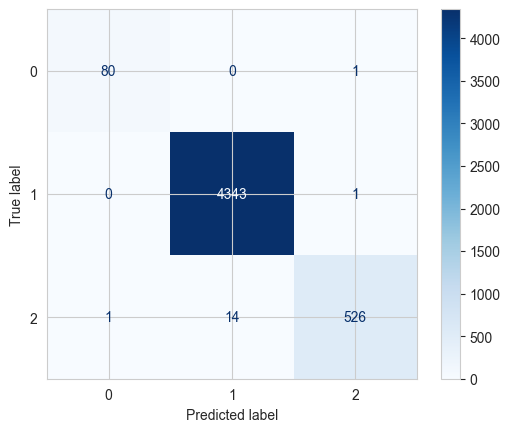

In [21]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
y_pred_lr = log_reg_model.predict(X_test_rf)

# Calculate the accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the baseline model: {accuracy_lr:.2f}\\n")

# Print the detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Visualize the results with a Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test_rf, y_test, cmap='Blues')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_rf, y_train)

print("Advanced Random Forest model trained successfully!")

Advanced Random Forest model trained successfully!


Accuracy of the Random Forest model: 1.00\n
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00      4344
           2       1.00      1.00      1.00       541

    accuracy                           1.00      4966
   macro avg       1.00      1.00      1.00      4966
weighted avg       1.00      1.00      1.00      4966

Confusion Matrix:


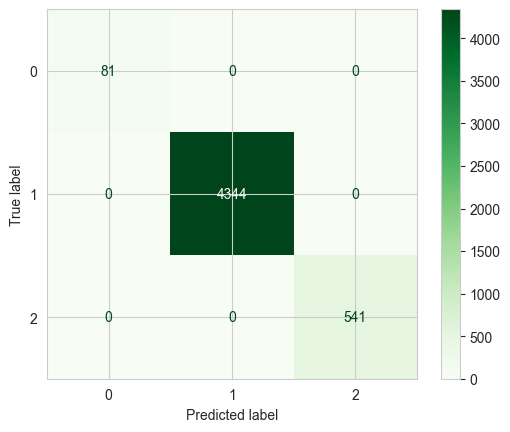

In [23]:
y_pred_rf = rf_model.predict(X_test_rf)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model: {accuracy_rf:.2f}\\n")

# Print the detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualize the results with a Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_rf, y_test, cmap='Greens')
plt.show()

# Milestone 3

In [24]:
numerical_features = ['mag', 'depth', 'latitude', 'longitude']
categorical_features = ['DOMSOI']

importances = rf_model.feature_importances_

feature_names = preprocessor_rf.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(feature_names)

importance_series = pd.Series(importances, index=all_feature_names)

sorted_importances = importance_series.sort_values(ascending=False)

print("Feature Importances (from most to least important):")
print(sorted_importances)

Feature Importances (from most to least important):
mag          9.111179e-01
depth        2.596317e-02
longitude    2.467733e-02
latitude     2.345137e-02
DOMSOI_I     7.741903e-04
                 ...     
DOMSOI_K     1.295189e-08
DOMSOI_Pg    0.000000e+00
DOMSOI_V     0.000000e+00
DOMSOI_Wm    0.000000e+00
DOMSOI_Zm    0.000000e+00
Length: 113, dtype: float64


C:\Users\sakth\AppData\Local\Temp\ipykernel_18568\2878366845.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(groups.values()), y=list(groups.keys()), palette='plasma')


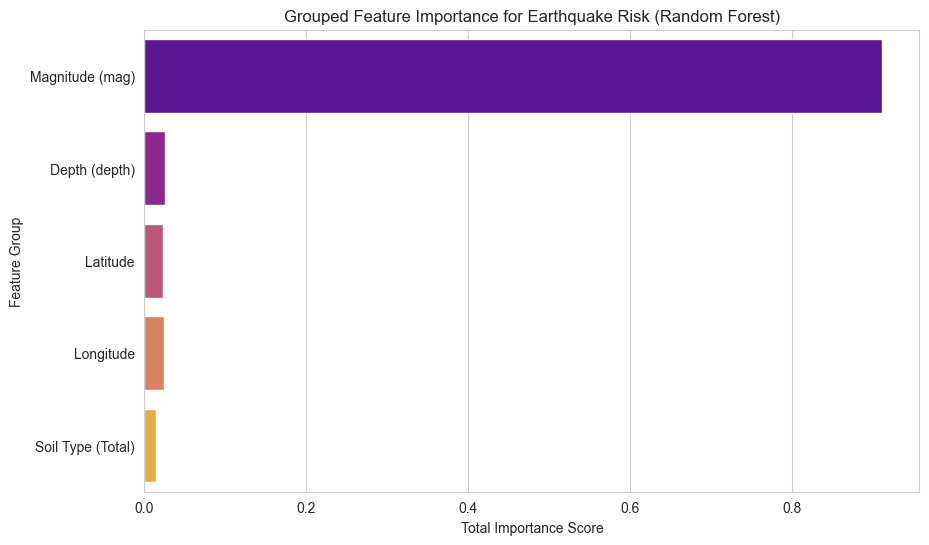

In [25]:
numerical_features = ['mag', 'depth', 'latitude', 'longitude']
categorical_features = ['DOMSOI']
soil_column_name = 'DOMSOI' # Explicitly define for this cell

importances = rf_model.feature_importances_
feature_names = preprocessor_rf.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = list(numerical_features) + list(feature_names)

groups = {
    'Magnitude (mag)': 0, 
    'Depth (depth)': 0, 
    'Latitude': 0, 
    'Longitude': 0, 
    'Soil Type (Total)': 0
}

for name, imp in zip(all_features, importances):
    if 'mag' == name: groups['Magnitude (mag)'] += imp
    elif 'depth' == name: groups['Depth (depth)'] += imp
    elif 'latitude' == name: groups['Latitude'] += imp
    elif 'longitude' == name: groups['Longitude'] += imp
    elif soil_column_name in name: groups['Soil Type (Total)'] += imp

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(groups.values()), y=list(groups.keys()), palette='plasma')
plt.title('Grouped Feature Importance for Earthquake Risk (Random Forest)')
plt.xlabel('Total Importance Score')
plt.ylabel('Feature Group')
plt.show()

In [26]:
import joblib
import os

soil_column_name = 'DOMSOI'

models_folder = 'models'
os.makedirs(models_folder, exist_ok=True)

print(f"Saving Random Forest components to '{models_folder}' folder...")

joblib.dump(preprocessor_rf, os.path.join(models_folder, 'preprocessor_rf.joblib')) 

joblib.dump(rf_model, os.path.join(models_folder, 'random_forest_model.joblib'))

joblib.dump(label_encoder, os.path.join(models_folder, 'label_encoder_rf.joblib'))

soil_types = df[soil_column_name].unique().tolist()
joblib.dump(soil_types, os.path.join(models_folder, 'soil_types_rf.joblib'))

print("Random Forest model, preprocessor, and soil types list saved successfully!")

Saving Random Forest components to 'models' folder...
Random Forest model, preprocessor, and soil types list saved successfully!


Loading dataset...
 Dataset loaded successfully!
 Defining damage risk levels based on magnitude...
 'damage_risk' column added.
 Selected features: ['mag', 'depth', 'latitude', 'longitude', 'DOMSOI']
 Target variable: damage_risk
Handled potential missing values. Features shape: (24828, 5), Target shape: (24828,)
 Encoding target variable...
 Target variable encoded. Classes: ['High' 'Medium']
쪼 Splitting data into training and testing sets...
   Training set size: 19862
   Testing set size: 4966
 Defining preprocessing steps...
 Preprocessor defined.
 Applying preprocessing to training and testing data...
 Preprocessing complete!
   Shape of processed training data: (19862, 112)
   Shape of processed testing data: (4966, 112)
   Total features after preprocessing: 112

 Training XGBoost Classifier...


C:\Users\sakth\AppData\Local\Temp\ipykernel_18568\743769323.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[soil_column_name] = X[soil_column_name].fillna('Unknown')
c:\Users\sakth\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:45:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 XGBoost model trained successfully!

 Evaluating XGBoost Model...
   Accuracy of the XGBoost model: 0.9990

   Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.97      0.98       104
      Medium       1.00      1.00      1.00      4862

    accuracy                           1.00      4966
   macro avg       0.99      0.99      0.99      4966
weighted avg       1.00      1.00      1.00      4966


   Confusion Matrix:


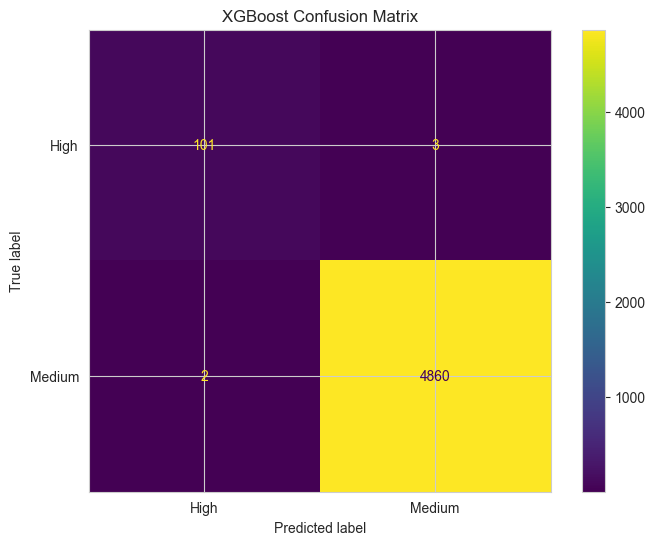


 Saving components to 'models' folder...
 Model, preprocessor, label encoder, and soil types list saved successfully!


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# --- 1. Load Data ---
print("Loading dataset...")
file_path = r'C:\Users\sakth\Desktop\ImpactSense\Soil_data\earthquakes_with_soil.csv'
try:
    df = pd.read_csv(file_path)
    print(" Dataset loaded successfully!")
except FileNotFoundError:
    print(f" Error: Dataset file not found at {file_path}")
    exit()

# --- 2. Feature Engineering (Define Damage Risk) ---
print(" Defining damage risk levels based on magnitude...")
df['damage_risk'] = pd.cut(df['mag'],
                           bins=[-1, 4.9, 6.9, float('inf')],
                           labels=['Low', 'Medium', 'High'])
print(" 'damage_risk' column added.")

# --- 3. Feature Selection ---
soil_column_name = 'DOMSOI'
features = ['mag', 'depth', 'latitude', 'longitude', soil_column_name]
target = 'damage_risk'

print(f" Selected features: {features}")
print(f" Target variable: {target}")

X = df[features]
y = df[target]

X[soil_column_name] = X[soil_column_name].fillna('Unknown')
y.dropna(inplace=True)
X = X.loc[y.index]

print(f"Handled potential missing values. Features shape: {X.shape}, Target shape: {y.shape}")

print(" Encoding target variable...")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f" Target variable encoded. Classes: {label_encoder.classes_}")

# --- 6. Data Splitting ---
print("쪼 Splitting data into training and testing sets...")
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)
print(f"   Training set size: {X_train.shape[0]}")
print(f"   Testing set size: {X_test.shape[0]}")

# --- 7. Preprocessing Pipeline ---
print(" Defining preprocessing steps...")
numerical_features = ['mag', 'depth', 'latitude', 'longitude']
categorical_features = [soil_column_name]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)
print(" Preprocessor defined.")

# --- 8. Apply Preprocessing ---
print(" Applying preprocessing to training and testing data...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(" Preprocessing complete!")
print(f"   Shape of processed training data: {X_train_processed.shape}")
print(f"   Shape of processed testing data: {X_test_processed.shape}")

ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)
print(f"   Total features after preprocessing: {len(all_feature_names)}")


# --- 9. Train XGBoost Model ---
print("\n Training XGBoost Classifier...")
xgb_model = XGBClassifier(
    random_state=42,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train_processed, y_train_encoded)
print(" XGBoost model trained successfully!")

# --- 10. Evaluate XGBoost Model ---
print("\n Evaluating XGBoost Model...")
y_pred_xgb = xgb_model.predict(X_test_processed)

# Calculate Accuracy
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"   Accuracy of the XGBoost model: {accuracy_xgb:.4f}\n")

# Classification Report
print("   Classification Report:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_)) # Use original labels

# Confusion Matrix
print("\n   Confusion Matrix:")
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    xgb_model,
    X_test_processed,
    y_test_encoded,
    display_labels=label_encoder.classes_,
    cmap='viridis',
    ax=ax
)
plt.title('XGBoost Confusion Matrix')
plt.show()

# --- 11. Optional: Save the Model, Preprocessor, and Label Encoder ---
models_folder = 'models'
os.makedirs(models_folder, exist_ok=True)

print(f"\n Saving components to '{models_folder}' folder...")
try:
    joblib.dump(preprocessor, os.path.join(models_folder, 'preprocessor_xgb.joblib'))
    joblib.dump(xgb_model, os.path.join(models_folder, 'xgboost_model.joblib'))
    joblib.dump(label_encoder, os.path.join(models_folder, 'label_encoder.joblib'))
    soil_types = df[soil_column_name].unique().tolist()
    joblib.dump(soil_types, os.path.join(models_folder, 'soil_types.joblib'))
    print(" Model, preprocessor, label encoder, and soil types list saved successfully!")
except Exception as e:
    print(f" Error saving components: {e}")

In [36]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np
import os

models_folder = 'models'
try:
    model = joblib.load(os.path.join(models_folder, 'xgboost_model.joblib'))
    preprocessor = joblib.load(os.path.join(models_folder, 'preprocessor_xgb.joblib'))
    label_encoder = joblib.load(os.path.join(models_folder, 'label_encoder.joblib'))
    
    try:
        soil_types = joblib.load(os.path.join(models_folder, 'soil_types.joblib'))
    except FileNotFoundError:
        print("Warning: 'soil_types.joblib' not found. Using soil types from DataFrame.")
        soil_types = ['Unknown']

    print("Model, preprocessor, and label encoder loaded successfully.")

except Exception as e:
    print(f"Error loading model components: {e}")
    print("Please ensure your models are trained and saved correctly in the 'models' folder.")

def predict_earthquake_risk(magnitude, depth, latitude, longitude, soil_type):
    try:
        input_data = pd.DataFrame({
            'mag': [magnitude],
            'depth': [depth],
            'latitude': [latitude],
            'longitude': [longitude],
            'DOMSOI': [soil_type]
        })

        input_processed = preprocessor.transform(input_data)
        prediction_encoded = model.predict(input_processed)
        
        prediction_proba = model.predict_proba(input_processed)

        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]

        confidences = {label_encoder.classes_[i]: float(prediction_proba[0][i]) for i in range(len(label_encoder.classes_))}
        
        return prediction_label, confidences

    except Exception as e:
        return f"Error: {e}", {}

if 'model' in locals():
    app_inputs = [
        gr.Slider(minimum=1.0, maximum=10.0, value=5.5, label="Magnitude (mag)"),
        gr.Number(value=50.0, label="Depth (km)"),
        gr.Slider(minimum=-90.0, maximum=90.0, value=34.0, label="Latitude"),
        gr.Slider(minimum=-180.0, maximum=180.0, value=-118.0, label="Longitude"),
        gr.Dropdown(choices=sorted(soil_types), label="Dominant Soil Type (DOMSOI)")
    ]

    app_outputs = [
        gr.Label(label="Predicted Magnitude Class"),
        gr.Label(label="Confidence Scores")
    ]

    demo = gr.Interface(
        fn=predict_earthquake_risk,
        inputs=app_inputs,
        outputs=app_outputs,
        title="Earthquake Risk Assessment (Enhanced Model)",
        description="Predict the earthquake magnitude class based on its properties. This model now includes 'depth' and 'soil type' for enhanced accuracy.",
        allow_flagging="never"
    )

    print("\nLaunching Gradio interface... (This will run in the notebook output)")
    demo.launch(debug=True)
else:
    print("\nCould not launch Gradio app because model failed to load.")

Model, preprocessor, and label encoder loaded successfully.


c:\Users\sakth\AppData\Local\Programs\Python\Python313\Lib\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(



Launching Gradio interface... (This will run in the notebook output)
* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
